<a href="https://colab.research.google.com/github/Data-Scientist400701/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 

***NETFLIX MOVIES AND TV SHOWS CLUSTERING***

##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### Team Member 1 - **Saaquib Mustafa**
##### Team Member 2 - **Sahil Kolambkar**


# **Project Summary -**

Initially, in the 1st step imported the data set to carry out the analysis over the data set to comprehend 
the details of available data and Checked for Null values and treated them. Here, we found more than 
30% null values in the director's column. Then, we take appropriate action for null values according 
to the circumstances. 
Performed the Exploratory data analysis and tried to get the understanding of the data and how the 
content is distributed in the dataset, its type and details such as which countries are watching more 
and which type of content is in demand etc. has been analyzed in this step with the help of visualization 
graph by getting insights from analysis. 
❖ Data preprocessing – in this we remove the punctuation and stops words also used stemming 
to reduce words to their basic form or stem, which may or may not be a legitimate word in 
the language. 
❖ We used the k-means clustering algorithm and then checked the model performance using 
Silhouette’s coefficient and elbow method to find the number of clusters.
Analyzing all the variables of the data set and identifying the solution for given tasks. Performed 
hypothesis testing to get the insights on duration of movies and content with respect to different 
variables. After doing feature engineering and finding the number of clusters, we used the k-means 
algorithm and then checked the model performance using Silhouette’s coefficient, to identify the best 
fit Model. The number of movies on Netflix is growing significantly faster than the number of TV 
shows. Because of covid-19, there is a significant drop in the number of movies and television episodes 
produced after 2019.

# **GitHub Link -**

https://github.com/Data-Scientist400701/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/tree/main

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected 
from flixable which is a third-party Netflix search engine. In 2018, they released an interesting report 
which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming 
service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of 
TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained 
from the same dataset. Integrating, this dataset with other external datasets such as IMDB ratings, 
rotten tomatoes can also provide many interesting findings.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
#necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone/Unsupervised ML (Netflix)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
Row, Column = df.shape
print(f"Number of rows is {Row}")
print(f"Number of columns is {Column}")

Number of rows is 7787
Number of columns is 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('There are {} duplicate values in dataset'.format(df.duplicated().sum()))

There are 0 duplicate values in dataset


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(f'Total Number of Null Values: {df.isna().sum().sum()}')

Total Number of Null Values: 3631


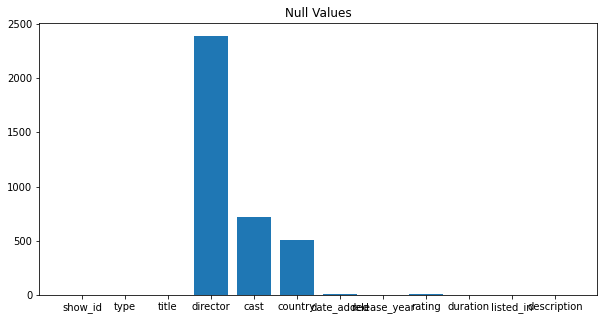

In [ ]:
# Visualizing the missing values
y=df.isna().sum()
plt.figure(figsize=(10,5))
plt.bar(y.index,y)
plt.title('Null Values')
plt.savefig("output1", facecolor='y', bbox_inches="tight",
            pad_inches=0.3, transparent=True)


### What did you know about your dataset?

Director has most number of null values, followed by cast and country

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 

In our dataset, most of the columns have categorical values

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df["date_added"] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

### What all manipulations have you done and insights you found?

Here, We have extracted date, month and year from single column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
fig_donut = px.pie(df, names='type', height=300, width=600, hole=0.7,

title='Most watched on Netflix',

color_discrete_sequence=['#b20710', '#221f1f'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=90)

fig_donut.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))
fig_donut.show(renderer='colab')

##### 1. Why did you pick the specific chart?


Donut charts are an effective way to visualize data, especially when comparing parts of a whole. They can be used to illustrate trends, outliers, and correlations between data sets. They are also useful for comparing data over time and comparing data across different locations.

##### 2. What is/are the insight(s) found from the chart?

The ratio of Tv show and movie is 31% to 69% in most watched on netflix

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this insights we can infer the watch times of different categories and working on one category who has more in number will definitely gonna help positive business impact.  

#### Chart - 2

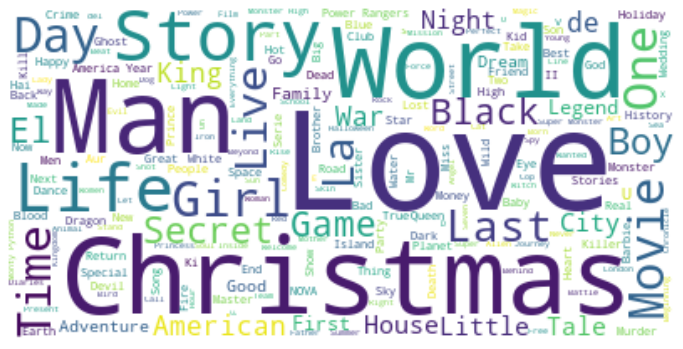

In [ ]:
# Chart - 2 visualization code
#subsetting df
df_word_cloud = df['title']
text = " ".join(word for word in df_word_cloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?


A word cloud is a visual representation of the frequency of words used in a text. It can help readers to quickly identify the most important or central topics of the text. This can be helpful for summarizing a text, or for studying a text more in depth.


##### 2. What is/are the insight(s) found from the chart?

It seems like words like "Love", "Man", "World", "Story" are very common in titles.
However, we are suprised by the overwhelming number of content having "Christmas" in their title.

We are suspecting "Christmas" titles to be a very seasonal thing with most of the shows likely to be released during the onth of December. However, we do not have the release month in this data to conform my hypothesis.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, We can identify which title is repeating how many times and which title is unique

#### Chart - 3

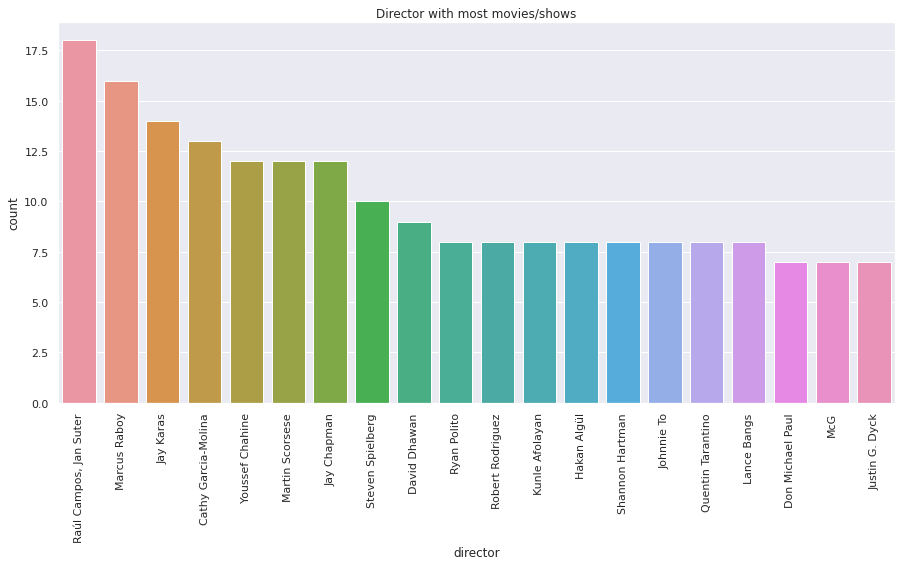

In [ ]:
#plot for director
plt.figure(figsize = (15,7))
sns.countplot(x='director',data=df,order=df.director.value_counts().head(20).index)
plt.title('Director with most movies/shows')
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?


A countplot is a type of plot used to visualize the frequency of certain values within a dataset. Countplots are useful for visualizing categorical data, as they provide a quick way to see the distribution of values.

##### 2. What is/are the insight(s) found from the chart?

Here, top 20 Directors with most number of Movies/Shows on Netflix. Highest is Raul Campos and lowest is Justin G. Dyck


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Here we can identify the directors' experience from the number of movies he directed 

#### Chart - 4

In [ ]:
#convert the actor to get final df for actor
def convert_to_list(df):
  cast_count = {}
  cast_count_final = []
  cast_list = list(df['cast'])
  for each in range(len(cast_list)):
    cast_count_final.extend(str(cast_list[each]).split(","))
  for each in cast_count_final:
    if each not in cast_count:
      cast_count[each] = cast_count_final.count(each)
  return cast_count

In [ ]:
cast_df = convert_to_list(df)

In [ ]:
#dataframe for cast v/s count
casts_df = pd.DataFrame.from_dict(cast_df, orient='index', columns=['count'])

In [ ]:
casts_df.sort_values('count', ascending=False).drop('nan')

count
 Anupam Kher           38
 Takahiro Sakurai      28
Shah Rukh Khan         27
 Om Puri               27
 Boman Irani           25
...                   ...
 Juan Manuel Diaz       1
 Ana Wills              1
 Mauricio Figueroa      1
 Matias Maldonado       1
 Rachel Khoo            1

[35372 rows x 1 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

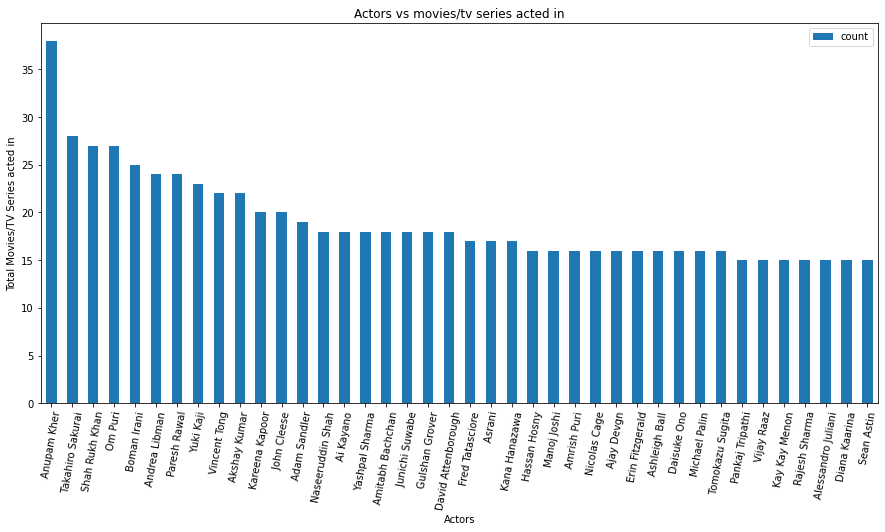

In [ ]:
  # plot for top actors and count
  plt.rcParams["figure.figsize"] = (15,7)
  casts_df.sort_values('count', ascending=False).drop('nan').head(40).plot(kind='bar')
  plt.xlabel("Actors")
  plt.ylabel("Total Movies/TV Series acted in")
  plt.title("Actors vs movies/tv series acted in")
  plt.xticks(rotation=80)

##### 1. Why did you pick the specific chart?


A countplot is a type of plot used to visualize the frequency of certain values within a dataset. Countplots are useful for visualizing categorical data, as they provide a quick way to see the distribution of values.

##### 2. What is/are the insight(s) found from the chart?

The most of movies acted by any actor is Anupum kher followed by Takahiro and shahrukh khan

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Here we can identify the actor' experience from the number of movies he acted. 

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
# Looking for countries and number of netflix productions
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if type(df['country'][i])== str:
    split=df['country'][i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'][i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'][i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [ ]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [ ]:
#Top 20 countries
top_countries=country_df.head(20)
top_countries = top_countries[top_countries['country']!='']
top_countries

country  Productions  TV-Shows  Movies
0    United States         3297       866    2431
1            India          990        75     915
2   United Kingdom          723       256     467
3           Canada          412       126     286
4           France          349        84     265
5            Japan          287       184     103
6            Spain          215        57     158
7      South Korea          212       157      55
8          Germany          199        42     157
9           Mexico          154        53     101
10           China          147        45     102
11       Australia          144        60      84
12           Egypt          110        13      97
13          Turkey          108        28      80
14       Hong Kong          102         5      97
15           Italy           90        23      67
16          Brazil           88        29      59
17          Taiwan           85        70      15
18         Belgium           85        11      74
19       Argentina           82        18      64

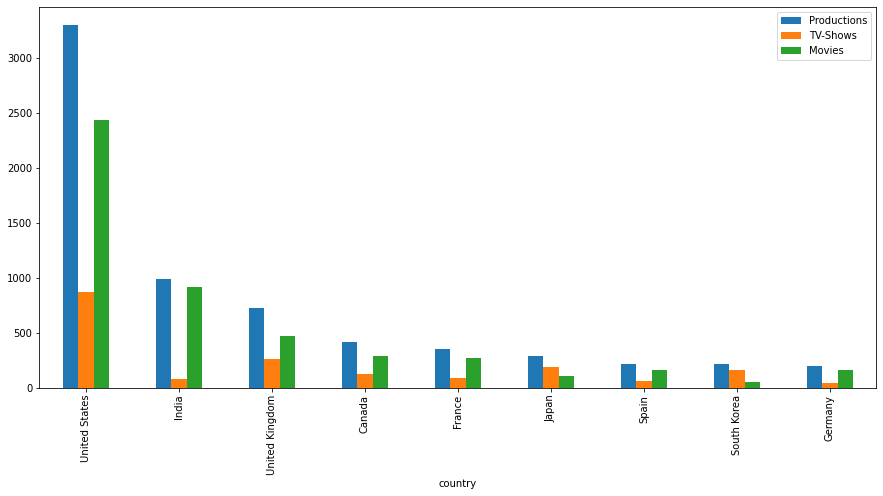

In [ ]:
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")
plt.rcParams['figure.figsize']=(20,10)

##### 1. Why did you pick the specific chart?


A countplot is a type of plot used to visualize the frequency of certain values within a dataset. Countplots are useful for visualizing categorical data, as they provide a quick way to see the distribution of values.


##### 2. What is/are the insight(s) found from the chart?

Highest number in production, Tv shows and movies is in USA country followed by India.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here, We can indentify the distribution of productions, Tv show and movies in different countries 

#### Chart - 6

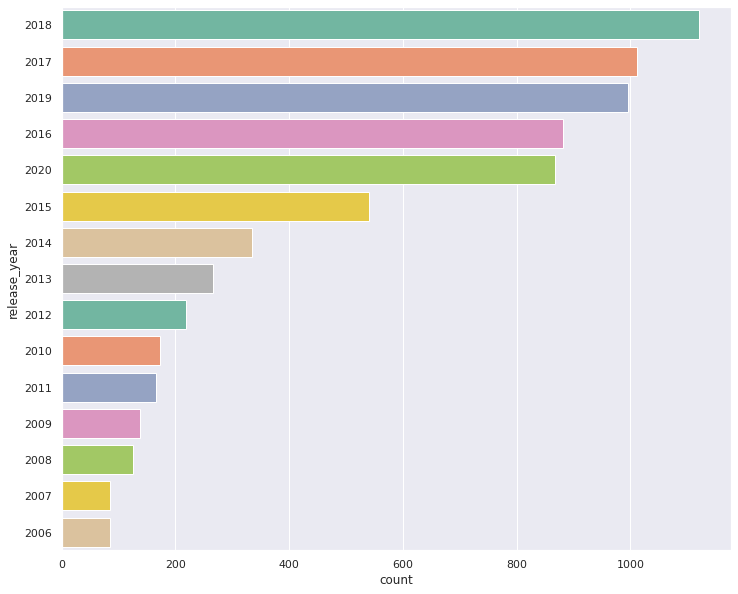

In [ ]:
#Chart 6
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df, palette="Set2", order=df['release_year'].value_counts().index[0:15])

##### 1. Why did you pick the specific chart?


A countplot is a type of plot used to visualize the frequency of certain values within a dataset. Countplots are useful for visualizing categorical data, as they provide a quick way to see the distribution of values.


##### 2. What is/are the insight(s) found from the chart?

Most movies/tv show got released in 2018 and least 2006

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here, we can tell in which year movies/tv show got released.

#### Chart - 7

In [ ]:
# content release over the year by content type
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['release_year'].value_counts().reset_index()
temp_df2 = df2['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)'))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['release_year'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)'))


layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR BY CONTENT TYPE' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')

##### 1. Why did you pick the specific chart?


A countplot is a type of plot used to visualize the frequency of certain values within a dataset. Countplots are useful for visualizing categorical data, as they provide a quick way to see the distribution of values.


##### 2. What is/are the insight(s) found from the chart?

In 2017, 744 Movies got released and 2020, In 457 Tv show got released.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here, we can tell in which year movies/tv show got released.

#### Chart - 8

In [ ]:
# Chart - 9 visualization code
#rating column distribution by plotly
fig_donut = px.pie(df, names='rating', height=1000, width=1000, hole=0.7,

title='MOST OF PROGRAMME ON NETFLIX IS TV-14 & TV-MA RATED',

color_discrete_sequence=['#b20710', '#221f1f'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=90)

fig_donut.update_layout(margin=dict(t=80, b=10, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))
fig_donut.show(renderer='colab')

##### 1. Why did you pick the specific chart?


Pie charts are useful for comparing proportions of different categories in a data set and can provide a quick visual representation of the relative size of each part to the whole. They are also a great way to quickly compare data between different groups or categories.

##### 2. What is/are the insight(s) found from the chart?

More content with Mature content is available on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here we can say what genre is more on netflix

#### Chart - 9

In [ ]:
#distribution for content using plotly
temp_df = df['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['rating'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'MOST OF PROGRAMME ON NETFLIX IS TV-14 & TV-MA RATED' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

##### 1. Why did you pick the specific chart?


A countplot is a type of plot used to visualize the frequency of certain values within a dataset. Countplots are useful for visualizing categorical data, as they provide a quick way to see the distribution of values.


##### 2. What is/are the insight(s) found from the chart?

Matured content on netflix available the most in netflix

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Distibution of type of programme on Netflix

#### Chart - 10

In [ ]:
# Chart - 11 visualization code
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['rating'].value_counts().reset_index()
temp_df2 = df2['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['rating'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['rating'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'RATING BY CONTENT TYPE' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')

##### 1. Why did you pick the specific chart?


A countplot is a type of plot used to visualize the frequency of certain values within a dataset. Countplots are useful for visualizing categorical data, as they provide a quick way to see the distribution of values.


##### 2. What is/are the insight(s) found from the chart?

Matured Movie is 1845 in number and matured tv show is 1018 in number

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Distribuition of TV Show and Movies in terms of rating

#### Chart - 11

In [ ]:
#genre to list
def convert_to_list(df):
  genre_count = {}
  genre_count_final = []
  genre_list = list(df['listed_in'])
  for each in range(len(genre_list)):
    genre_count_final.extend(genre_list[each].split(", "))
  for each in genre_count_final:
    if each not in genre_count:
      genre_count[each] = genre_count_final.count(each)
  return genre_count

In [ ]:
genre_dict = convert_to_list(df)

In [ ]:
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns=['count']).sort_values('count', ascending=False)

In [ ]:
#genre distribution
genre_df

count
International Movies           2437
Dramas                         2106
Comedies                       1471
International TV Shows         1199
Documentaries                   786
Action & Adventure              721
TV Dramas                       704
Independent Movies              673
Children & Family Movies        532
Romantic Movies                 531
TV Comedies                     525
Thrillers                       491
Crime TV Shows                  427
Kids' TV                        414
Docuseries                      353
Romantic TV Shows               333
Stand-Up Comedy                 329
Music & Musicals                321
Horror Movies                   312
British TV Shows                232
Reality TV                      222
Sci-Fi & Fantasy                218
Sports Movies                   196
Korean TV Shows                 150
TV Action & Adventure           150
Anime Series                    148
Spanish-Language TV Shows       147
Classic Movies                  103
LGBTQ Movies                     90
TV Mysteries                     90
Science & Nature TV              85
TV Sci-Fi & Fantasy              76
TV Horror                        69
Teen TV Shows                    60
Cult Movies                      59
Faith & Spirituality             57
Anime Features                   57
Movies                           56
Stand-Up Comedy & Talk Shows     52
TV Thrillers                     50
Classic & Cult TV                27
TV Shows                         12

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

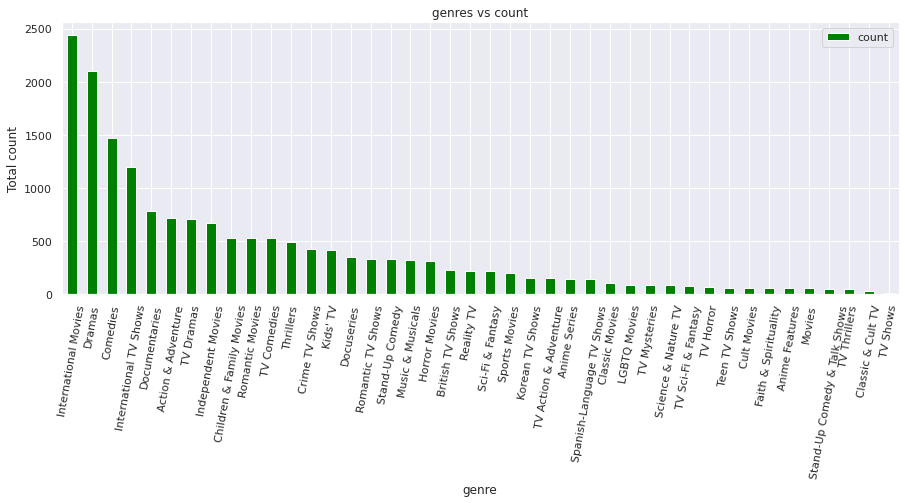

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
genre_df.plot(kind='bar', color='green')
plt.xlabel("genre")
plt.ylabel("Total count")
plt.title("genres vs count")
plt.xticks(rotation=80)

##### 1. Why did you pick the specific chart?


A countplot is a type of plot used to visualize the frequency of certain values within a dataset. Countplots are useful for visualizing categorical data, as they provide a quick way to see the distribution of values.


##### 2. What is/are the insight(s) found from the chart?

Inference: International Movies make up the top most genre!

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Distribuition according to genre

#### Chart - 12 

In [ ]:
total_cast=[]
for i in range(len(df['cast'])):
  total_cast.extend(str(df['cast'][i]).split(','))
total_cast_count={}
for i in set(total_cast):
  total_cast_count[f"{i}"]=total_cast.count(i)
cast_count_df = pd.DataFrame(list(total_cast_count.items()),columns=['Names','Count']) 
cast_count_df.sort_values(by='Count',ascending=False,inplace=True)
cast_count_df.reset_index(drop=True,inplace=True)
cast_count_df=cast_count_df[1:]
cast_count_df.reset_index(drop=True,inplace=True)
top_10_df=cast_count_df[:20]
df['cast'].fillna(value='None',inplace=True)
test_df=df.copy()
custom_data_actor=['A Family Man','AJIN: Demi-Human','Kismat Konnection','Happy New Year','Darna Mana Hai','Bhool Bhulaiyaa','Hatchimals | Adventures in Hatchtopia','Berserk: The Golden Age Arc II - The Battle for Doldrey','Iron Man: Armored Adventures','Gabbar Is Back','Elliot the Littlest Reindeer','Kabhi Khushi Kabhie Gham','Hubie Halloween','Ek Khiladi Ek Haseena','Kabhi Alvida Naa Kehna','Frozen Planet: The Epic Journey','Hazaaron Khwaishein Aisi','Kabhi Haan Kabhi Naa','DRAGON PILOT: Hisone & Masotan','Gargantia on the Verdurous Planet']
top_10_df['Movies']=custom_data_actor
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] 
import plotly.express as px
fig = px.treemap(top_10_df, path=['Names'],values='Count', width=1400, height=600,title='Top 20 filmstars and their movie counts',custom_data=['Movies'])
fig.update_layout(
    treemapcolorway = colors,
    margin = dict(t=50, l=25, r=25, b=25))
fig.update_traces(texttemplate='Film Star: %{label} <br>Number of movies: %{value}<br>Casted in:%{customdata[0]}<br>',
                  hovertemplate='Film Star: %{label} <br>Number of movies: %{value}<br>Casted in: %{customdata[0]}<br>')
fig.show()

##### 1. Why did you pick the specific chart?


A treemap is a type of chart that displays hierarchical data in the form of nested rectangles. Treemaps can also be used to identify underlying patterns in the data, such as clusters, outliers, or other trends.


#### Chart - 13 

In [ ]:
#subsetting data for visualisation
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="TV Shows", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Movies", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content added over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show(renderer='colab')

##### 1. Why did you pick the specific chart?


Pair plots are useful for exploratory data analysis and can help identify relationships between variables that may not be immediately obvious. They can also be used to identify clusters in the data, which can be used for further analysis and modeling.


##### 2. What is/are the insight(s) found from the chart?

In 2019 highest movie got released and in 2020 highest Tv show got released

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
#since there are many crows with nan director, we have filled it using empty string
df['director']=df['director'].fillna('')

#replacing cast with also empty string
df['cast']=df['cast'].fillna('')

#missing dealth with empty string replacing
df_actors = df['cast'].fillna('')

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used fillna for missing value imputation because 
fillna is an important function in data cleaning and pre-processing. It is used to fill in missing values in a dataset, usually with a placeholder value such as 0, or a more meaningful value such as the mean or median of the data. This helps to ensure that all of the data is valid and accounted for in the analysis. Additionally, it can help to reduce the number of errors that can arise from missing data, since the placeholder value is consistent across all observations.

### 2. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 5.2 MB/s 
     |████████████████████████████████| 110 kB 51.5 MB/s 


In [ ]:
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                        João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                                               Nasty C   
7785                                            Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                               None   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                                NaN 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  month_added  \
0     In a future where the elite inhabit an island ...          8.0   
1     After a devastating earthquake hits Mexico Cit...         12.0   
2     When an army recruit i

In [ ]:
# import library
import contractions
df['description']=df['description'].apply(lambda x: contractions.fix(x))
df['description']

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7787, dtype: object

#### 2. Lower Casing

In [ ]:
df['description']= df['description'].apply(lambda x: x.lower())

In [ ]:
df['description']

0       in a future where the elite inhabit an island ...
1       after a devastating earthquake hits mexico cit...
2       when an army recruit is found dead, his fellow...
3       in a postapocalyptic world, rag-doll robots hi...
4       a brilliant group of students become card-coun...
                              ...                        
7782    when lebanon's civil war deprives zozo of his ...
7783    a scrappy but poor boy worms his way into a ty...
7784    in this documentary, south african rapper nast...
7785    dessert wizard adriano zumbo looks for the nex...
7786    this documentary delves into the mystique behi...
Name: description, Length: 7787, dtype: object

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string
string.punctuation

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['description']= df['description'].apply(lambda x:remove_punctuation(x))

In [ ]:
df['description']

0       in a future where the elite inhabit an island ...
1       after a devastating earthquake hits mexico cit...
2       when an army recruit is found dead his fellow ...
3       in a postapocalyptic world ragdoll robots hide...
4       a brilliant group of students become cardcount...
                              ...                        
7782    when lebanons civil war deprives zozo of his f...
7783    a scrappy but poor boy worms his way into a ty...
7784    in this documentary south african rapper nasty...
7785    dessert wizard adriano zumbo looks for the nex...
7786    this documentary delves into the mystique behi...
Name: description, Length: 7787, dtype: object

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)
df['description']= df['description'].apply(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['description']

0       future elite inhabit island paradise far crowd...
1       devastating earthquake hits mexico city trappe...
2       army recruit found dead fellow soldiers forced...
3       postapocalyptic world ragdoll robots hide fear...
4       brilliant group students become cardcounting e...
                              ...                        
7782    lebanons civil war deprives zozo family left g...
7783    scrappy poor boy worms way tycoons dysfunction...
7784    documentary south african rapper nasty c hits ...
7785    dessert wizard adriano zumbo looks next “willy...
7786    documentary delves mystique behind bluesrock t...
Name: description, Length: 7787, dtype: object

In [ ]:
df_test=df.copy()

In [ ]:
# Remove White spaces
df_test['description']=df_test['description'].apply(lambda x:x.split())
df_test['description']=df_test['description'].apply(lambda x:' '.join(x))
df_test['description']

0       future elite inhabit island paradise far crowd...
1       devastating earthquake hits mexico city trappe...
2       army recruit found dead fellow soldiers forced...
3       postapocalyptic world ragdoll robots hide fear...
4       brilliant group students become cardcounting e...
                              ...                        
7782    lebanons civil war deprives zozo family left g...
7783    scrappy poor boy worms way tycoons dysfunction...
7784    documentary south african rapper nasty c hits ...
7785    dessert wizard adriano zumbo looks next “willy...
7786    documentary delves mystique behind bluesrock t...
Name: description, Length: 7787, dtype: object

#### 7. Tokenization

In [ ]:
df_test['description'][7786]

'documentary delves mystique behind bluesrock trio explores enigmatic band created iconic look sound'

In [ ]:
nltk.download('punkt')
def tokenize(column):
  tokens = nltk.word_tokenize(column)
  return [w for w in tokens if w.isalpha()]  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df_test['description'] = df.apply(lambda x: tokenize(x['description']), axis=1)
df_test['description']

0       [future, elite, inhabit, island, paradise, far...
1       [devastating, earthquake, hits, mexico, city, ...
2       [army, recruit, found, dead, fellow, soldiers,...
3       [postapocalyptic, world, ragdoll, robots, hide...
4       [brilliant, group, students, become, cardcount...
                              ...                        
7782    [lebanons, civil, war, deprives, zozo, family,...
7783    [scrappy, poor, boy, worms, way, tycoons, dysf...
7784    [documentary, south, african, rapper, nasty, c...
7785    [dessert, wizard, adriano, zumbo, looks, next,...
7786    [documentary, delves, mystique, behind, bluesr...
Name: description, Length: 7787, dtype: object

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

df_test['description']=df_test['description'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df_test['description']

0       [future, elite, inhabit, island, paradise, far...
1       [devastating, earthquake, hit, mexico, city, t...
2       [army, recruit, found, dead, fellow, soldier, ...
3       [postapocalyptic, world, ragdoll, robot, hide,...
4       [brilliant, group, student, become, cardcounti...
                              ...                        
7782    [lebanon, civil, war, deprives, zozo, family, ...
7783    [scrappy, poor, boy, worm, way, tycoon, dysfun...
7784    [documentary, south, african, rapper, nasty, c...
7785    [dessert, wizard, adriano, zumbo, look, next, ...
7786    [documentary, delf, mystique, behind, bluesroc...
Name: description, Length: 7787, dtype: object

##### Which text normalization technique have you used and why?

We have used Lemmatization because
It stems the word but makes sure that it does not lose its meaning.  Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.

#### 9. Part of speech tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
df_test['description'] = df_test['description'].apply(nltk.pos_tag)
df_test['description']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


0       [(future, JJ), (elite, JJ), (inhabit, NN), (is...
1       [(devastating, VBG), (earthquake, NN), (hit, V...
2       [(army, NN), (recruit, NN), (found, VBN), (dea...
3       [(postapocalyptic, JJ), (world, NN), (ragdoll,...
4       [(brilliant, JJ), (group, NN), (student, NN), ...
                              ...                        
7782    [(lebanon, RB), (civil, JJ), (war, NN), (depri...
7783    [(scrappy, JJ), (poor, JJ), (boy, NN), (worm, ...
7784    [(documentary, JJ), (south, JJ), (african, JJ)...
7785    [(dessert, JJ), (wizard, NN), (adriano, NN), (...
7786    [(documentary, JJ), (delf, NN), (mystique, NN)...
Name: description, Length: 7787, dtype: object

#### 10. Text Vectorization

In [ ]:
words = df.description

In [ ]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=15000)
X= t_vectorizer.fit_transform(words)

In [ ]:
type(X)

scipy.sparse.csr.csr_matrix

##### Which text vectorization technique have you used and why?


The tf–idf value increases proportionally to the number of times a word appears in the document. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?


Dimensionality reduction is needed in order to reduce the complexity of data and make it easier to work with. By reducing the number of variables in a dataset, it can help to eliminate redundant or irrelevant features, reduce the noise in the data, and improve the accuracy of models and predictions. Dimensionality reduction is also useful for visualizing high-dimensional data, as it can help to compress the data into a 2 or 3 dimensional space that can be easily visualized.

In [ ]:
# DImensionality Reduction (If needed)
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

PCA()

Text(0, 0.5, 'cumulative explained variance')

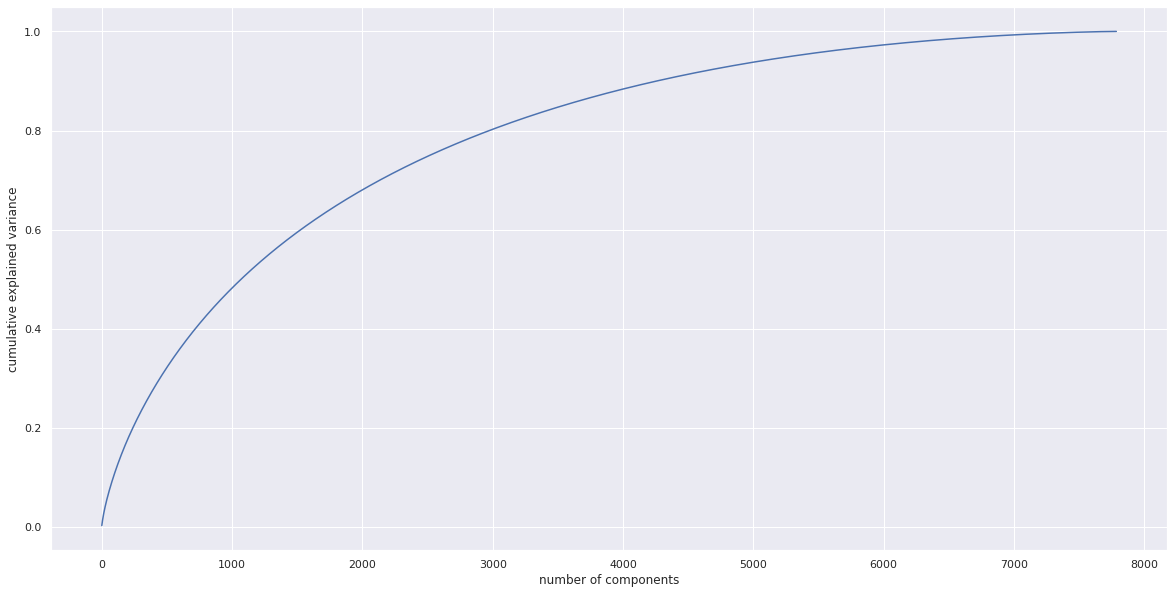

In [ ]:
#explained var v/s comp
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

80% of variance explained with 3000 components

In [ ]:
#choosing right dim from plot, this might take a while, for ready ans use n_components = 3000
from sklearn.decomposition import PCA
transformer = PCA(n_components=3000)
transformer.fit(X.toarray())
X_transformed = transformer.transform(X.toarray())
X_transformed.shape

(7787, 3000)

In [ ]:
# vectorizing the test and train
X_vectorized = t_vectorizer.transform(words)


In [ ]:
#applying pca
X= transformer.transform(X_vectorized.toarray())
X

array([[-1.62829821e-02,  3.19826194e-02, -3.40608910e-02, ...,
         4.11490943e-02, -1.59305146e-03, -1.55876882e-02],
       [-4.77595606e-03, -3.00674661e-03,  8.33841110e-02, ...,
         1.74085438e-02,  3.89654566e-03,  3.49632830e-03],
       [-1.82743391e-02,  2.70491684e-03, -4.59546703e-02, ...,
        -7.59203633e-03,  2.01162880e-02,  2.74793352e-03],
       ...,
       [-7.38634109e-02, -6.52735650e-02,  3.05587056e-02, ...,
         8.18299364e-03,  6.37185280e-04,  5.24540020e-05],
       [-1.72038742e-02, -7.31769449e-03, -2.33777432e-03, ...,
        -8.04877611e-03,  1.74661698e-02, -9.99715765e-05],
       [-9.34988601e-02, -8.94228415e-02,  2.92345276e-02, ...,
         5.37431730e-03,  4.33596114e-04, -6.30204650e-03]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA dimensionality reduction for a variety of reasons. 
One of the primary reasons is to reduce the complexity and noise of data by reducing the number of features or variables. This can help to reduce the computational cost associated with data analysis, as well as make it easier to interpret the results. Additionally, PCA can be used to find the most important or relevant features and discard the rest, helping to eliminate irrelevant data and improve the accuracy of the analysis.

## ***7. ML Model Implementation***

### ML Model - KMeans

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

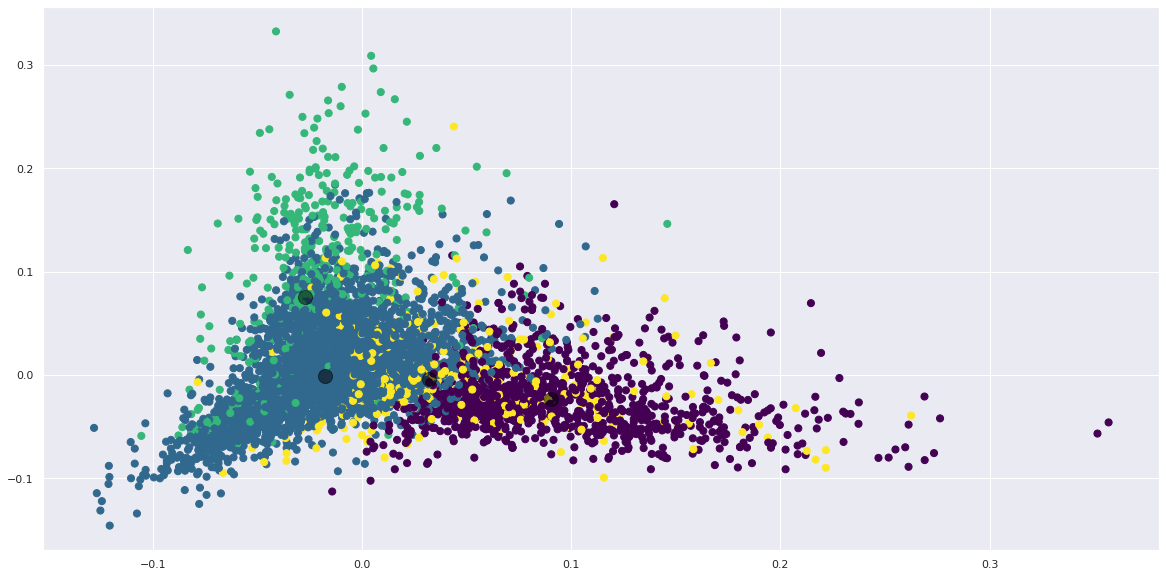

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

For n_clusters = 2 The average silhouette_score is : 0.0038274262047896693
For n_clusters = 3 The average silhouette_score is : 0.0017848717688943039
For n_clusters = 4 The average silhouette_score is : 0.002174954318628018
For n_clusters = 5 The average silhouette_score is : 0.002714129553779928
For n_clusters = 6 The average silhouette_score is : 0.0015735172151224467
For n_clusters = 8 The average silhouette_score is : 0.002250001778230167
For n_clusters = 9 The average silhouette_score is : 0.002643008973495706
For n_clusters = 11 The average silhouette_score is : 0.003215420723614951
For n_clusters = 12 The average silhouette_score is : 0.004523764355144577
For n_clusters = 13 The average silhouette_score is : 0.002415959566736706
For n_clusters = 14 The average silhouette_score is : 0.004474888577918948
For n_clusters = 15 The average silhouette_score is : 0.00468240742104734
For n_clusters = 16 The average silhouette_score is : 0.0049198886469704215
For n_clusters = 17 The avera

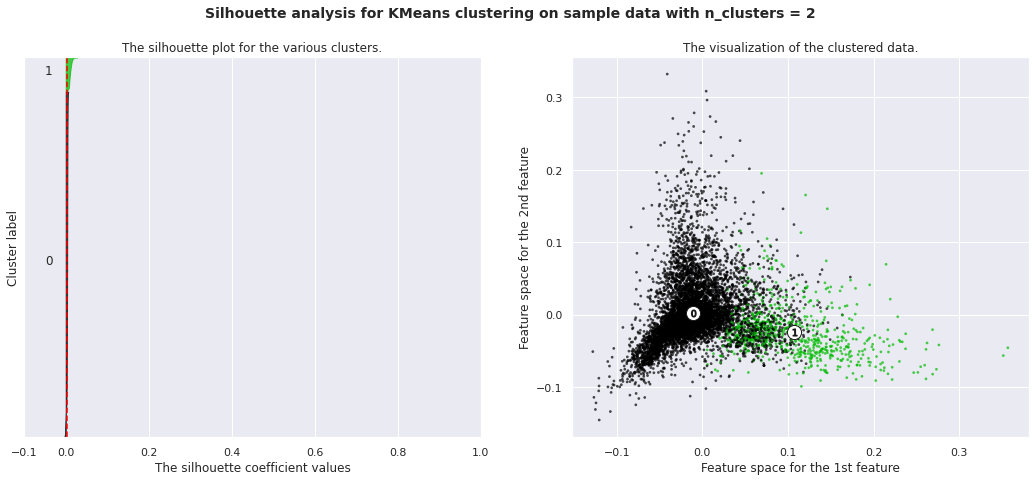

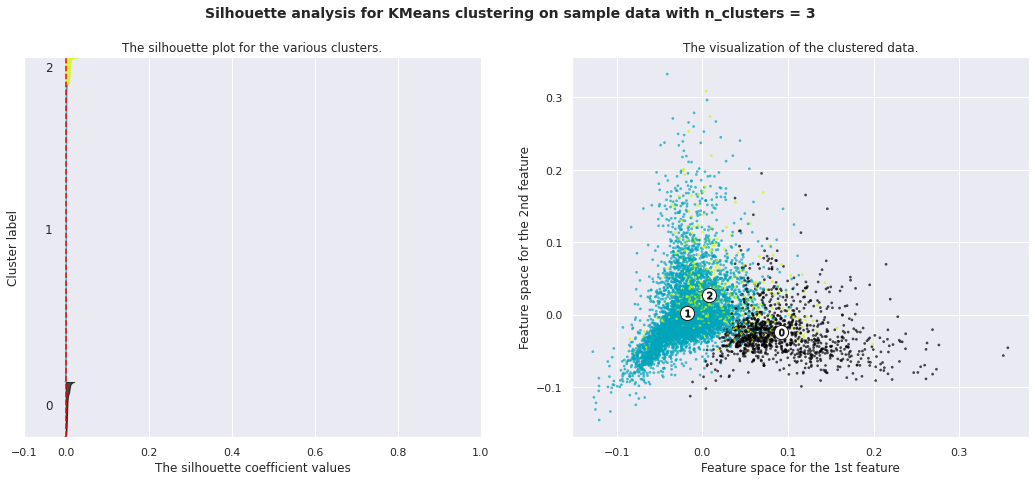

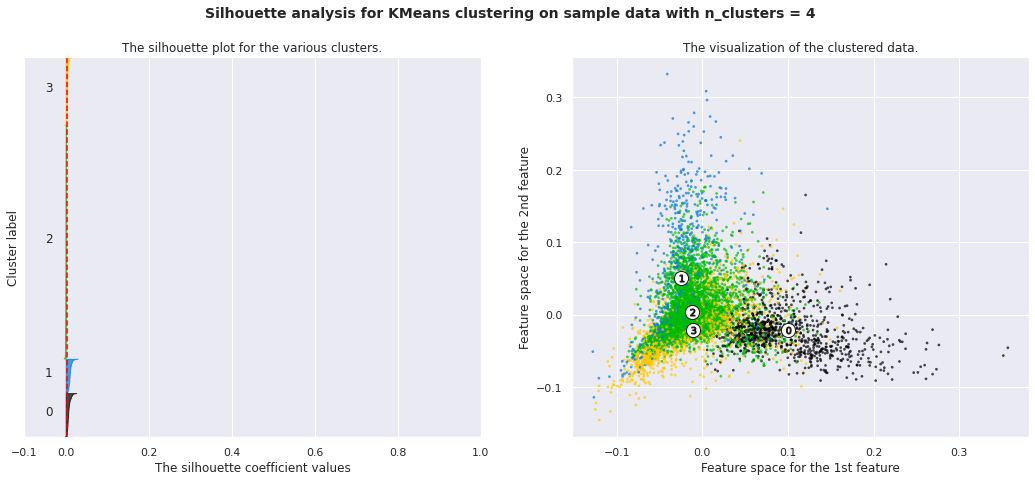

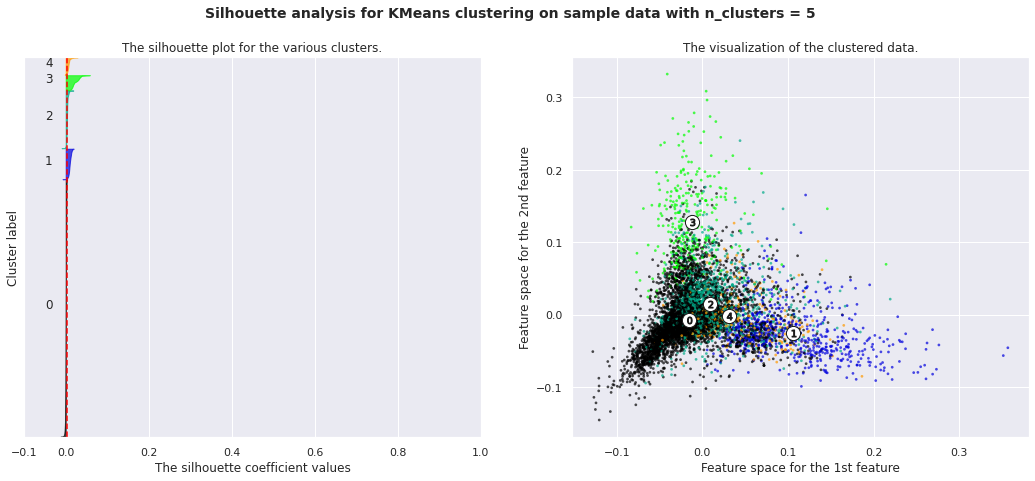

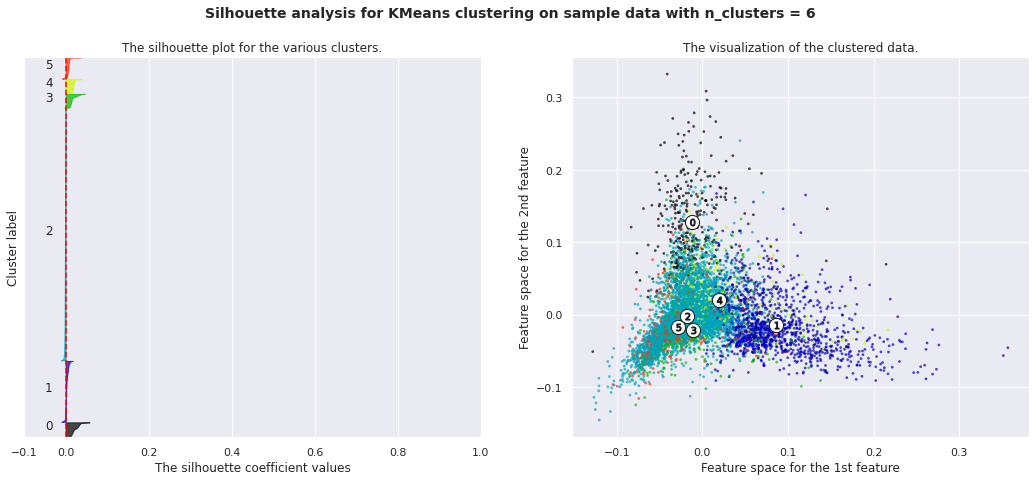

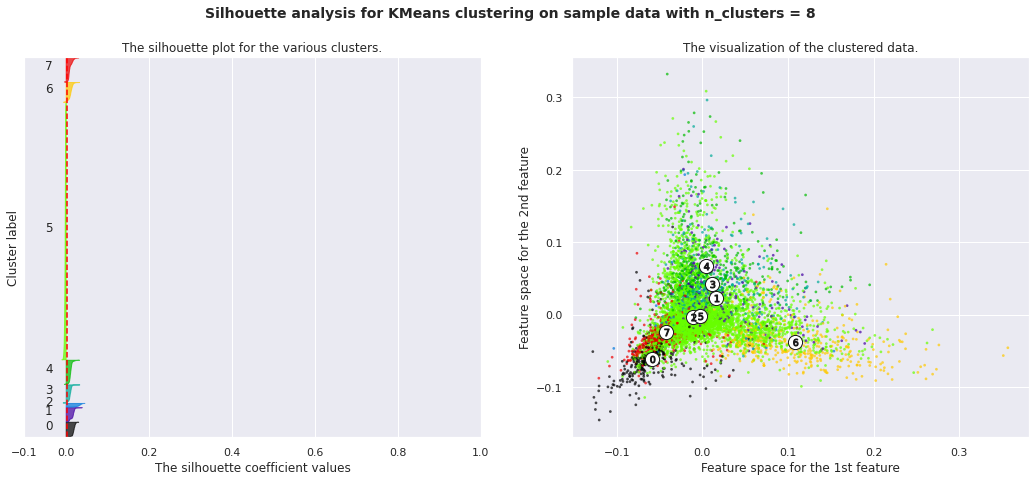

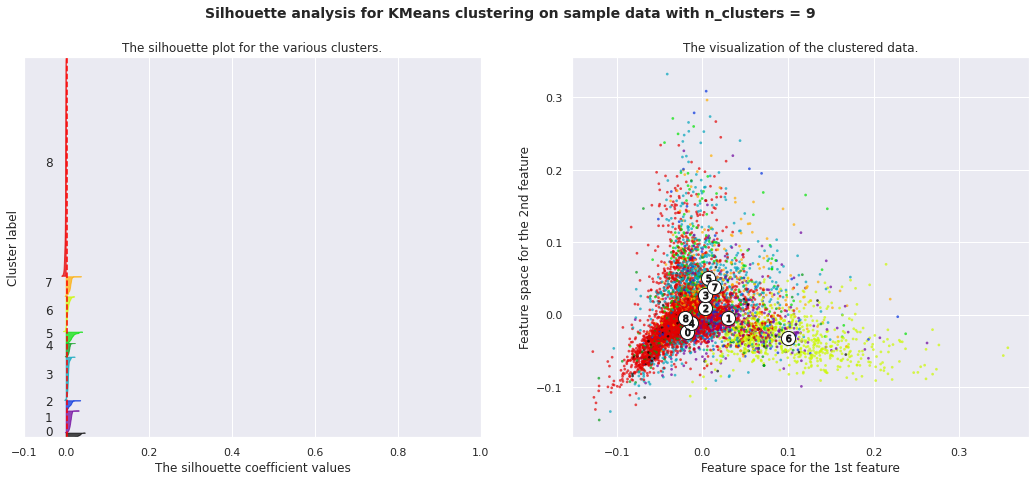

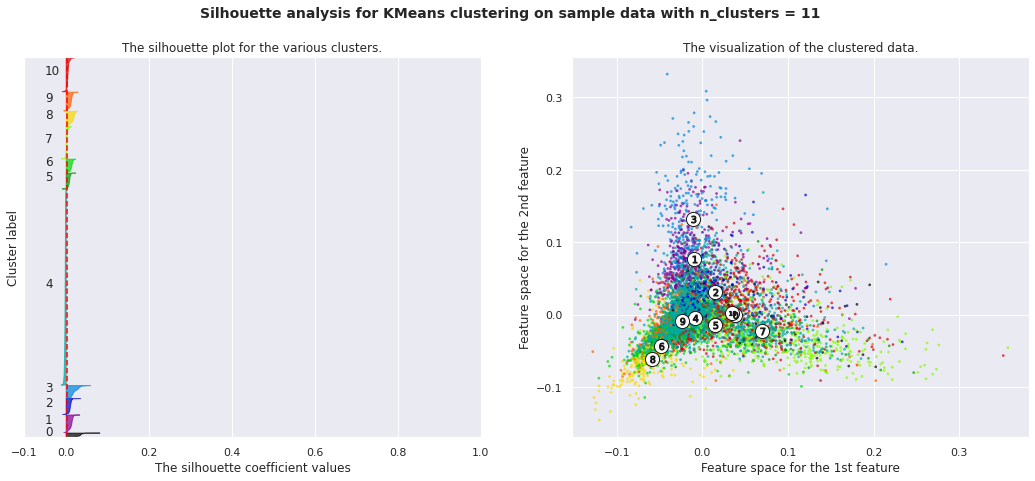

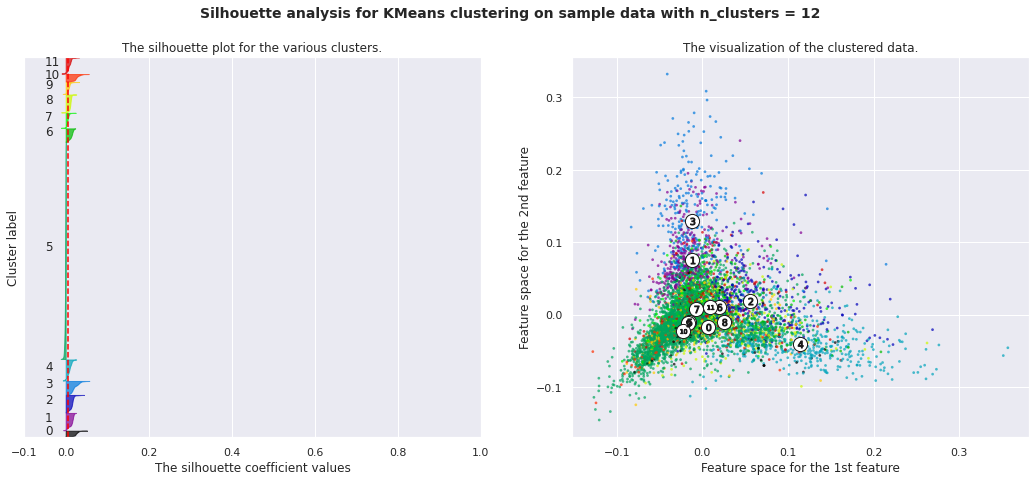

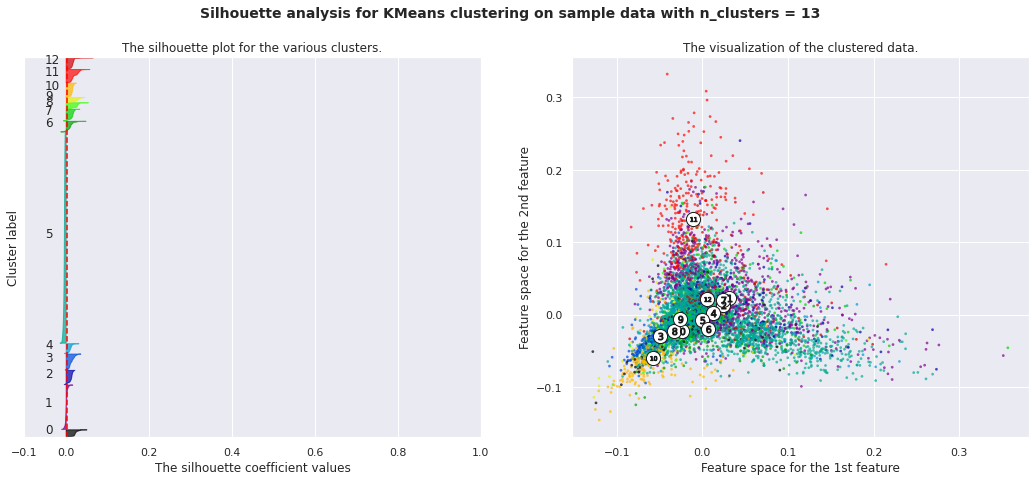

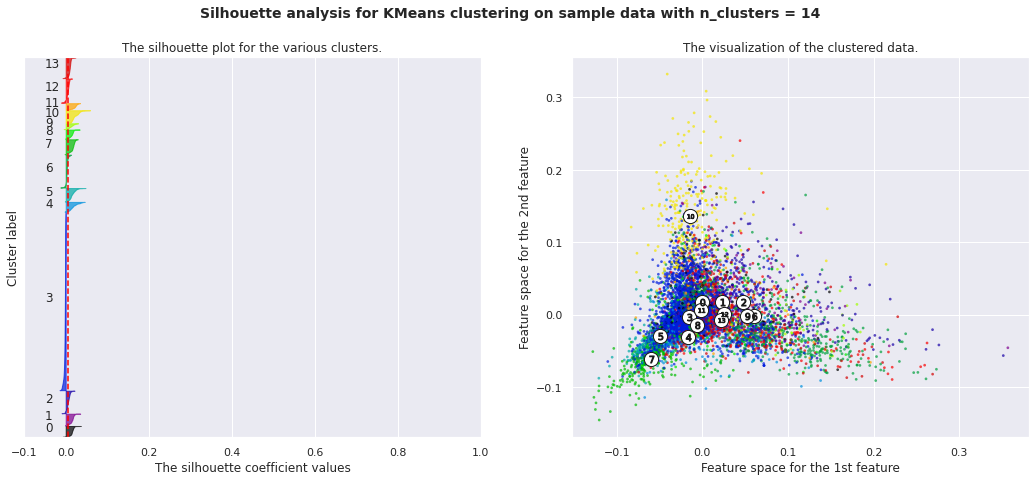

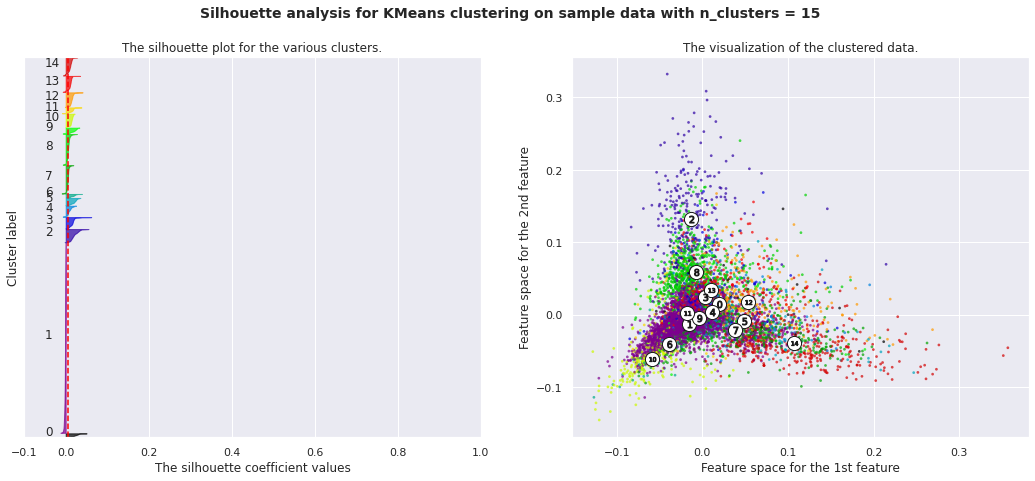

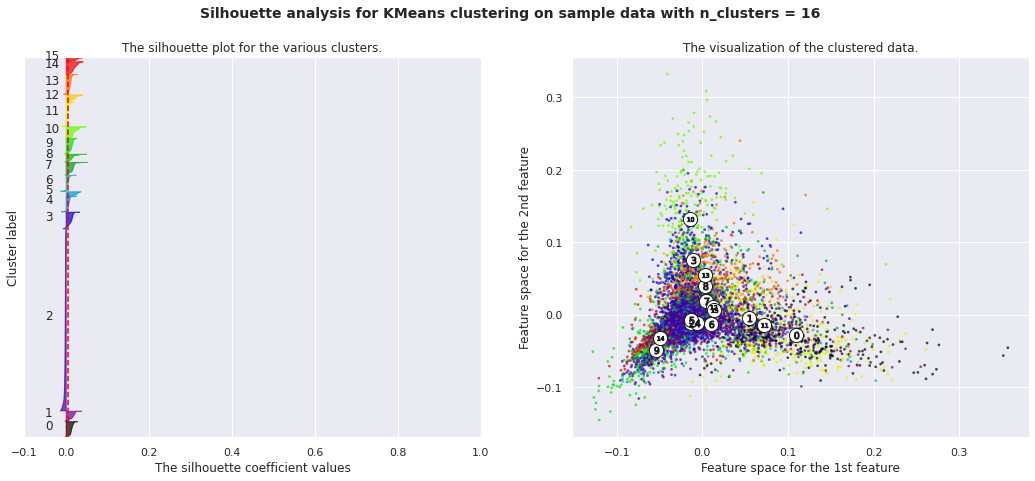

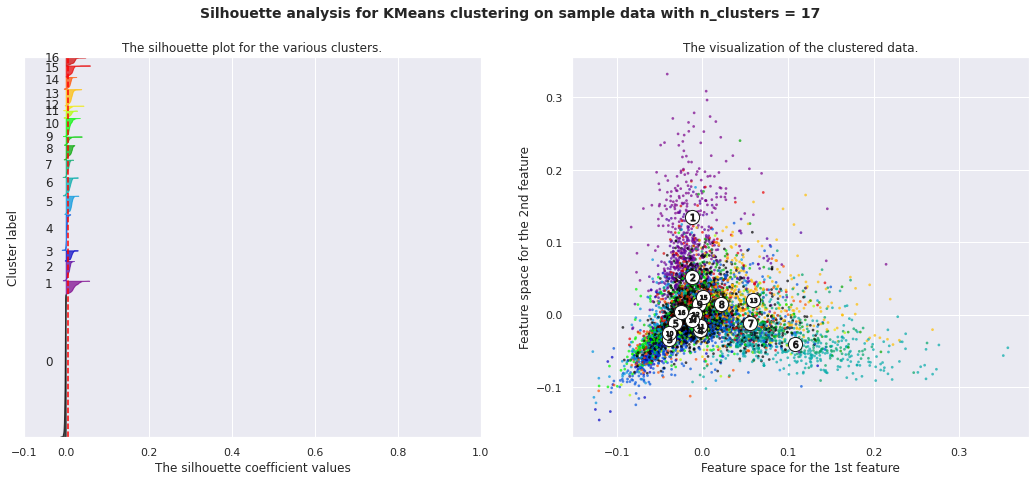

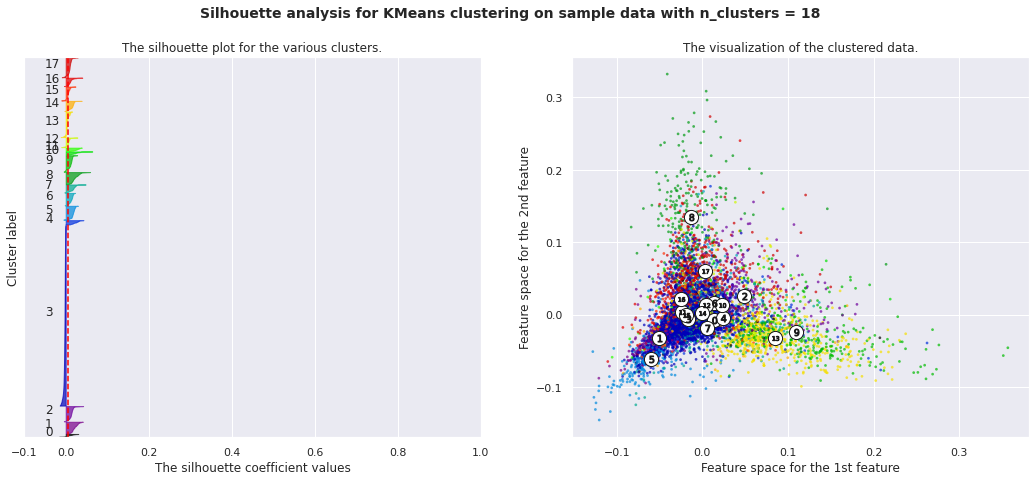

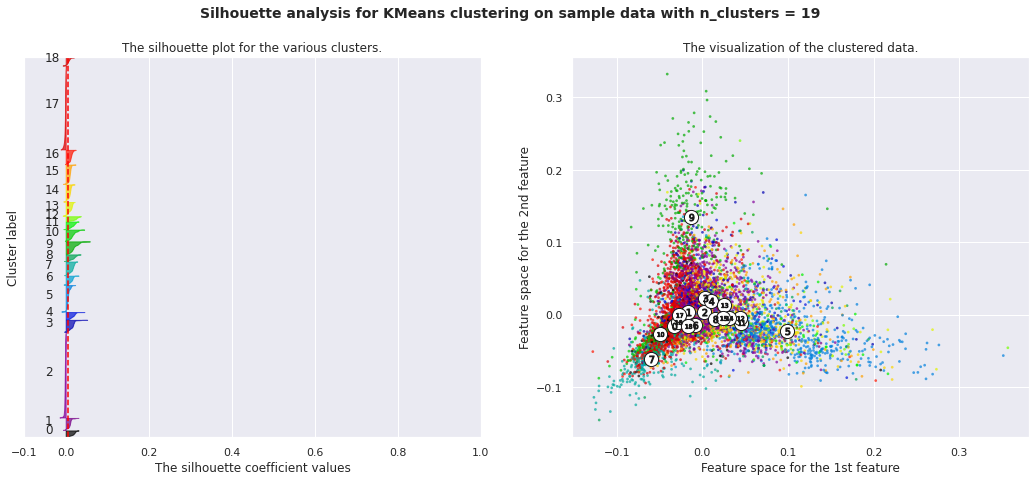

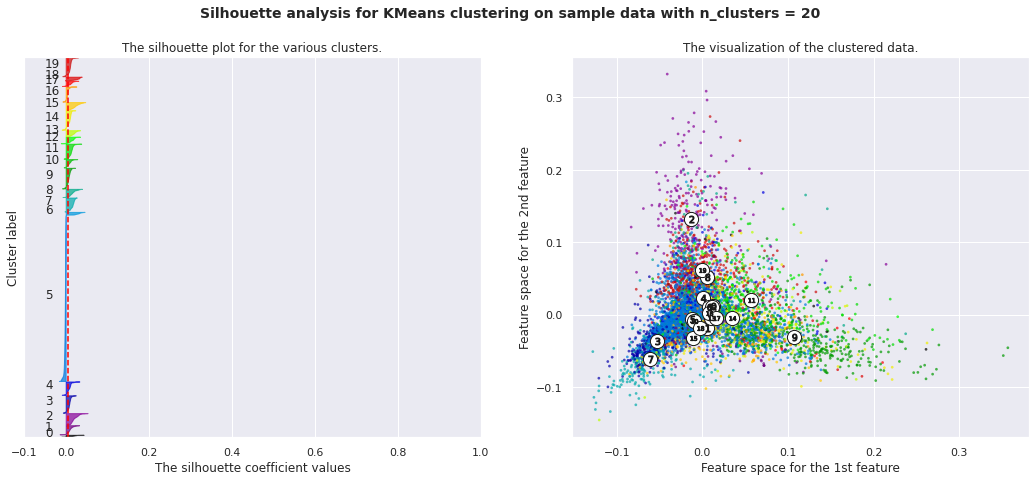

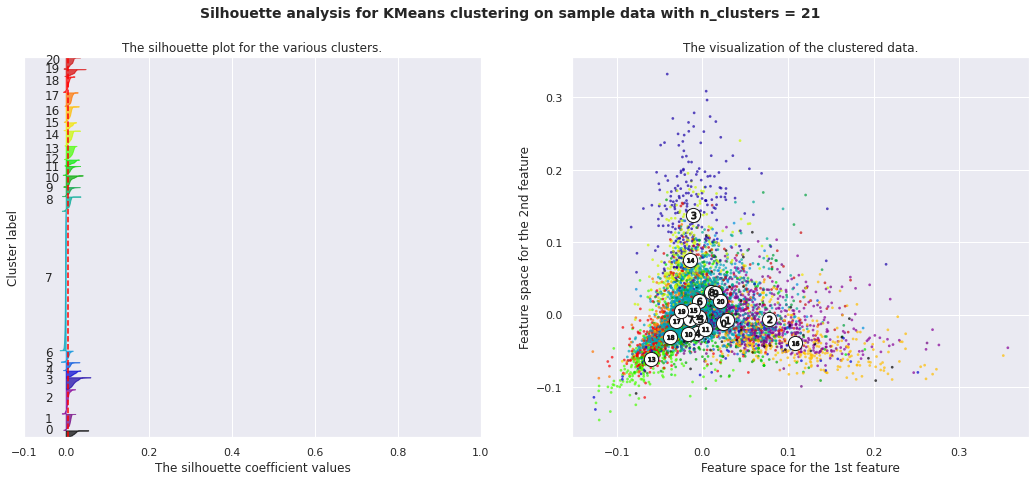

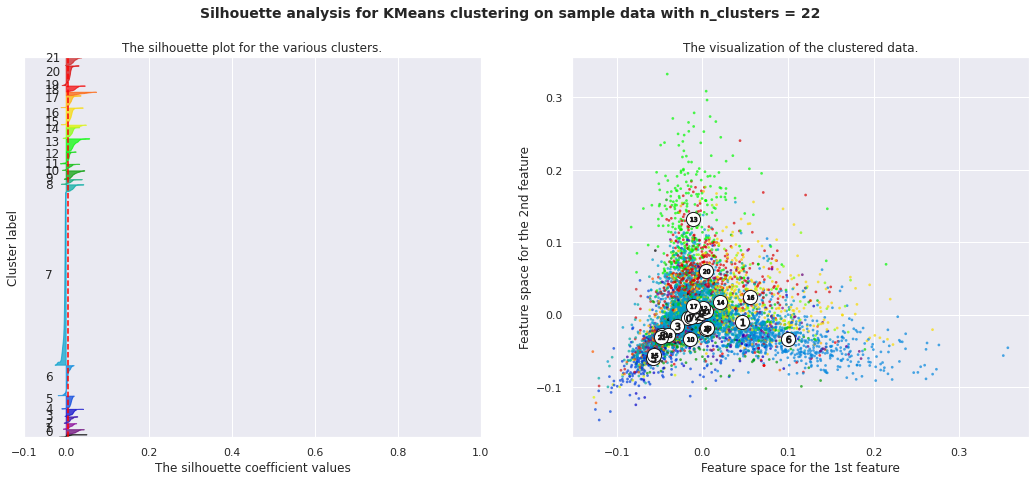

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 8, 9, 11, 12,13,14,15,16,17,18,19,20,21,22]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f89e2098fa0>,
                 estimator=KMeans(n_clusters=21), k=(4, 22),
                 metric='silhouette', timings=False)

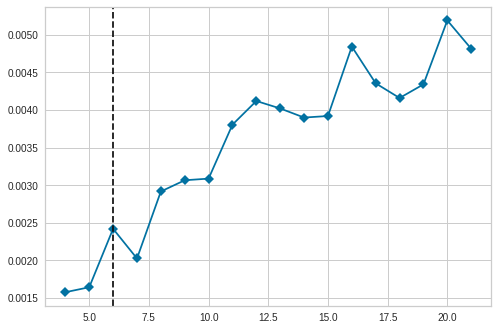

In [ ]:
# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans

# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

#  # Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,22), metric='silhouette', timings=False
)
visualizer.fit(X)  

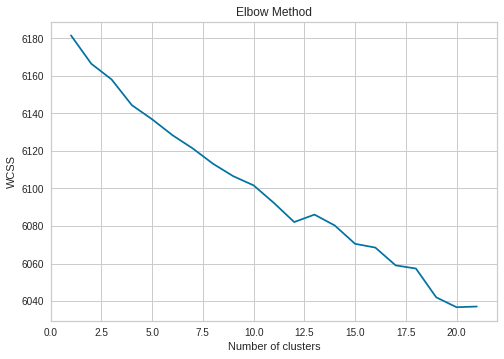

In [ ]:
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Lets select optimal value of K as 9

In [ ]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=9, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)

KMeans(n_clusters=9, n_init=1)

Silhouette Coefficient:  0.004


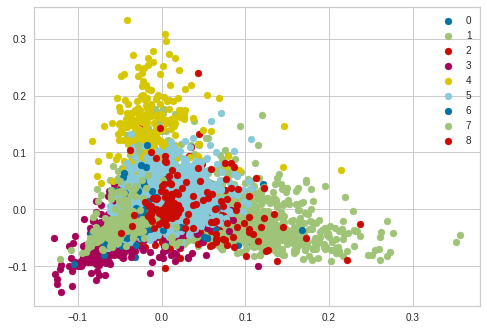

In [ ]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient:  %0.3f"%silhouette_score(X, kmeans.labels_))

#predict the labels of clusters.
label = kmeans.fit_predict(X)

#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

#Labelling the dataset as per the cluster

In [ ]:
# kmeans label to cluster column
df_test['cluster'] = kmeans.labels_
df_test

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                        João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                                               Nasty C   
7785                                            Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                               None   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                                NaN 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  month_added  \
0     [(future, JJ), (elite, JJ), (inhabit, NN), (is...          8.0   
1     [(devastating, VBG), (earthquake, NN), (hit, V...         12.0   
2     [(army, NN), (recruit,

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df_test[['cluster',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
df_test

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                        João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                                               Nasty C   
7785                                            Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                               None   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                                NaN 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  month_added  \
0     [(future, JJ), (elite, JJ), (inhabit, NN), (is...          8.0   
1     [(devastating, VBG), (earthquake, NN), (hit, V...         12.0   
2     [(army, NN), (recruit,

In [ ]:
df_test['cluster'].value_counts()

5    4480
1    1332
3     589
2     372
7     333
4     295
0     132
6     130
8     124
Name: cluster, dtype: int64

#Cluster 0 : Dramas & International TV Shows

In [ ]:
df_test[df_test['cluster'] == 0][['type','title','director','cast','country','rating','listed_in','description']]

type                                        title  \
33      Movie                                 #realityhigh   
184     Movie       A Haunting at Silver Falls: The Return   
244     Movie                            A truthful Mother   
267     Movie                               Aakhri Adaalat   
374     Movie               Albion: The Enchanted Stallion   
...       ...                                          ...   
7050    Movie                  This Is Not What I Expected   
7059    Movie                        Thor: Tales of Asgard   
7165  TV Show                                      Toy Boy   
7279    Movie  Twin Murders: the Silence of the White City   
7466    Movie                          Walk Away from Love   

                       director  \
33             Fernando Lebrija   
184                Teo Konuralp   
244   Ravishankar Venkateswaran   
267                 Rajiv Mehra   
374             Castille Landon   
...                         ...   
7050                  Derek Hui   
7059                    Sam Liu   
7165                              
7279          Daniel Calparsoro   
7466          Christopher Nolen   

                                                   cast  \
33    Nesta Cooper, Kate Walsh, John Michael Higgins...   
184   Laura Flannery, James Cavlo, Harry Hains, Clem...   
244   Revathi, Roger Narayanan, Sneha Ravishankar, V...   
267   Vinod Khanna, Dimple Kapadia, Jackie Shroff, S...   
374   Daniel Sharman, Jennifer Morrison, Debra Messi...   
...                                                 ...   
7050  Takeshi Kaneshiro, Zhou Dongyu, Sun Yizhou, Mi...   
7059  Matthew Wolf, Rick Gomez, Tara Strong, Alistai...   
7165  Jesús Mosquera, Cristina Castaño, María Pedraz...   
7279  Belén Rueda, Javier Rey, Aura Garrido, Manolo ...   
7466  Noree Victoria, Brad James, Robert Christopher...   

                      country rating  \
33              United States  TV-14   
184             United States  TV-14   
244                     India  TV-Y7   
267                     India  TV-14   
374   United States, Bulgaria  TV-PG   
...                       ...    ...   
7050                    China  TV-PG   
7059    United States, Canada  TV-Y7   
7165                    Spain  TV-MA   
7279                    Spain  TV-MA   
7466            United States  TV-14   

                                              listed_in  \
33                                             Comedies   
184                   Horror Movies, Independent Movies   
244                            Children & Family Movies   
267            Action & Adventure, International Movies   
374                            Children & Family Movies   
...                                                 ...   
7050    Comedies, International Movies, Romantic Movies   
7059                           Children & Family Movies   
7165  Crime TV Shows, International TV Shows, Spanis...   
7279                    International Movies, Thrillers   
7466                            Dramas, Romantic Movies   

                                            description  
33    [(nerdy, RB), (high, JJ), (schooler, NN), (dan...  
184   [(ghost, NN), (serial, JJ), (killer, NN), (aun...  
244   [(facing, VBG), (drought, JJ), (hungry, JJ), (...  
267   [(intrepid, JJ), (police, NNS), (inspector, NN...  
374   [(magical, JJ), (horse, NN), (transport, NN), ...  
...                                                 ...  
7050  [(romance, NN), (cuisine, NN), (mix, NN), (per...  
7059  [(thor, NN), (marvel, NN), (comic, JJ), (book,...  
7165  [(seven, CD), (year, NN), (málaga, FW), (priso...  
7279  [(detective, JJ), (return, NN), (vitoriagastei...  
7466  [(heartbroken, VBN), (last, JJ), (relationship...  

[132 rows x 8 columns]

#Cluster 1 : Sc-Fi, Adventure and Action

In [ ]:
df_test[df_test['cluster'] == 1][['type','title','director','cast','country','rating','listed_in','description']]

type                              title          director  \
16    TV Show                             Feb-09                     
27      Movie                             #Alive            Cho Il   
32      Movie                #FriendButMarried 2     Rako Prijanto   
37      Movie                         #Selfie 69    Cristina Jacob   
39      Movie                     ¡Ay, mi madre!       Frank Ariza   
...       ...                                ...               ...   
7769    Movie           Zindagi Na Milegi Dobara       Zoya Akhtar   
7772    Movie  Zipi & Zape y la Isla del Capitan      Oskar Santos   
7775  TV Show                         Zoids Wild                     
7776    Movie                           Zokkomon  Satyajit Bhatkal   
7777  TV Show                        Zombie Dumb                     

                                                   cast      country rating  \
16    Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...          NaN  TV-14   
27                             Yoo Ah-in, Park Shin-hye  South Korea  TV-MA   
32    Adipati Dolken, Mawar de Jongh, Sari Nila, Von...    Indonesia   TV-G   
37    Maia Morgenstern, Olimpia Melinte, Crina Semci...      Romania  TV-MA   
39    Estefanía de los Santos, Secun de la Rosa, Ter...        Spain  TV-MA   
...                                                 ...          ...    ...   
7769  Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...        India  TV-14   
7772  Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...        Spain  TV-PG   
7775  Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...        Japan  TV-Y7   
7776  Darsheel Safary, Anupam Kher, Manjari Fadnis, ...        India     PG   
7777                                               None          NaN  TV-Y7   

                                           listed_in  \
16                 International TV Shows, TV Dramas   
27    Horror Movies, International Movies, Thrillers   
32     Dramas, International Movies, Romantic Movies   
37            Comedies, Dramas, International Movies   
39                    Comedies, International Movies   
...                                              ...   
7769          Comedies, Dramas, International Movies   
7772              Children & Family Movies, Comedies   
7775                          Anime Series, Kids' TV   
7776                Children & Family Movies, Dramas   
7777          Kids' TV, Korean TV Shows, TV Comedies   

                                            description  
16    [(psychology, NN), (professor, NN), (face, NN)...  
27    [(grisly, RB), (virus, JJ), (rampage, NN), (ci...  
32    [(ayu, RB), (ditto, VBZ), (finally, RB), (tran...  
37    [(painful, JJ), (breakup, NN), (trio, NN), (pa...  
39    [(estranged, VBN), (mother, NN), (suddenly, RB...  
...                                                 ...  
7769  [(three, CD), (friend, VBP), (adventurous, JJ)...  
7772  [(christmas, NN), (zip, NN), (zap, NN), (take,...  
7775  [(quest, JJS), (freedom, NN), (legendary, JJ),...  
7776  [(cruel, JJ), (uncle, NN), (abandon, NN), (you...  
7777  [(living, VBG), (alone, RB), (spooky, JJ), (to...  

[1332 rows x 8 columns]

#Cluster 2 : International Movies

In [ ]:
df_test[df_test['cluster'] == 2][['type','title','director','cast','country','rating','listed_in','description']]

type                          title            director  \
17      Movie                         22-Jul     Paul Greengrass   
18      Movie                         15-Aug  Swapnaneel Jayakar   
19      Movie                            '89                       
58    TV Show                    100% Hotter                       
87    TV Show                     21 Thunder                       
...       ...                            ...                 ...   
7711  TV Show      YG Future Strategy Office                       
7728    Movie  You Don't Mess with the Zohan        Dennis Dugan   
7738  TV Show                Young Wallander                       
7755  TV Show                       Z Nation                       
7774    Movie                         Zodiac       David Fincher   

                                                   cast  \
17    Anders Danielsen Lie, Jon Øigarden, Jonas Stra...   
18    Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...   
19                   Lee Dixon, Ian Wright, Paul Merson   
58    Daniel Palmer, Melissa Sophia, Karen Williams,...   
87    Stephanie Bennett, Emmanuel Kabongo, RJ Fether...   
...                                                 ...   
7711  Seungri, Yoo Byung Jae, Lee Jai-jin, Jinu, Son...   
7728  Adam Sandler, John Turturro, Emmanuelle Chriqu...   
7738  Adam Pålsson, Richard Dillane, Leanne Best, El...   
7755  Nat Zang, Russell Hodgkinson, Michael Welch, A...   
7774  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   

                             country rating  \
17    Norway, Iceland, United States      R   
18                             India  TV-14   
19                    United Kingdom  TV-PG   
58                    United Kingdom  TV-14   
87                            Canada  TV-MA   
...                              ...    ...   
7711                     South Korea  TV-MA   
7728                   United States     UR   
7738                  United Kingdom  TV-MA   
7755                   United States  TV-MA   
7774                   United States      R   

                                              listed_in  \
17                                    Dramas, Thrillers   
18                 Comedies, Dramas, Independent Movies   
19                                        Sports Movies   
58    British TV Shows, International TV Shows, Real...   
87    Crime TV Shows, International TV Shows, TV Dramas   
...                                                 ...   
7711  International TV Shows, Korean TV Shows, TV Co...   
7728                       Action & Adventure, Comedies   
7738  Crime TV Shows, International TV Shows, TV Dramas   
7755      TV Action & Adventure, TV Comedies, TV Horror   
7774                     Cult Movies, Dramas, Thrillers   

                                            description  
17    [(devastating, VBG), (terror, NN), (attack, NN...  
18    [(india, JJ), (independence, NN), (day, NN), (...  
19    [(mixing, VBG), (old, JJ), (footage, NN), (int...  
58    [(stylist, JJ), (hair, NN), (designer, NN), (m...  
87    [(player, NN), (coach, NN), (montreal, NN), (s...  
...                                                 ...  
7711  [(kpop, NN), (star, NN), (seungri, JJ), (bigba...  
7728  [(israeli, JJ), (counterterrorism, NN), (soldi...  
7738  [(incendiary, JJ), (hate, NN), (crime, NN), (s...  
7755  [(team, NN), (embarks, VBZ), (perilous, JJ), (...  
7774  [(political, JJ), (cartoonist, NN), (crime, NN...  

[372 rows x 8 columns]

#Cluster 3 : Comedy

In [ ]:
df_test[df_test['cluster'] == 3][['type','title','director','cast','country','rating','listed_in','description']]

type                                    title  \
13      Movie                                    2,215   
28      Movie            #AnneFrank - Parallel Stories   
29    TV Show                                 #blackAF   
30      Movie                         #cats_the_mewvie   
35      Movie                                #Rucker50   
...       ...                                      ...   
7748    Movie                                الف مبروك   
7771    Movie                                     Zion   
7773    Movie                           Zoé: Panoramas   
7784    Movie                        Zulu Man in Japan   
7786    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                   director  \
13                      Nottapon Boonprakob   
28              Sabina Fedeli, Anna Migotto   
29                                            
30                         Michael Margolis   
35                    Robert McCullough Jr.   
...                                     ...   
7748                      Ahmed Nader Galal   
7771                             Floyd Russ   
7773  Rodrigo Guardiola, Gabriel Cruz Rivas   
7784                                          
7786                               Sam Dunn   

                                                   cast  \
13                                   Artiwara Kongmalai   
28                          Helen Mirren, Gengher Gatti   
29    Kenya Barris, Rashida Jones, Iman Benson, Genn...   
30                                                 None   
35                                                 None   
...                                                 ...   
7748  Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fis...   
7771                                         Zion Clark   
7773  Sergio Acosta, Jesús Báez, Ángel Mosqueda, Rod...   
7784                                            Nasty C   
7786                                               None   

                                    country rating  \
13                                 Thailand  TV-MA   
28                                    Italy  TV-14   
29                            United States  TV-MA   
30                                   Canada  TV-14   
35                            United States  TV-PG   
...                                     ...    ...   
7748                                  Egypt  TV-14   
7771                          United States  TV-PG   
7773                                 Mexico  TV-MA   
7784                                    NaN  TV-MA   
7786  United Kingdom, Canada, United States  TV-MA   

                                              listed_in  \
13    Documentaries, International Movies, Sports Mo...   
28                  Documentaries, International Movies   
29                                          TV Comedies   
30                  Documentaries, International Movies   
35                         Documentaries, Sports Movies   
...                                                 ...   
7748             Comedies, Dramas, International Movies   
7771                       Documentaries, Sports Movies   
7773  Documentaries, International Movies, Music & M...   
7784  Documentaries, International Movies, Music & M...   
7786                    Documentaries, Music & Musicals   

                                            description  
13    [(intimate, JJ), (documentary, NN), (follows, ...  
28    [(diary, JJ), (anne, NN), (frank, JJ), (story,...  
29    [(kenya, NNS), (barris, VBP), (family, NN), (n...  
30    [(pawesome, JJ), (documentary, JJ), (explores,...  
35    [(documentary, JJ), (celebrates, NNS), (annive...  
...                                                 ...  
7748  [(wedding, VBG), (day, NN), (arrogant, JJ), (g...  
7771  [(born, VBN), (without, IN), (leg, JJ), (stuck...  
7773  [(introspective, JJ), (rockumentary, JJ), (fol...  
7784  [(documentary, JJ), (south, JJ), (african, JJ)...  
7786  [(documentary, JJ), (delf, NN), (mys


#Cluster 4 : Romantic Movies

In [ ]:
df_test[df_test['cluster'] == 4][['type','title','director','cast','country','rating','listed_in','description']]

type                                title         director  \
7       Movie                                  187   Kevin Reynolds   
31      Movie                    #FriendButMarried    Rako Prijanto   
46      Movie                     1 Chance 2 Dance       Adam Deyoe   
47      Movie                        1 Mile to You      Leif Tilden   
55      Movie  100 Things to do Before High School                    
...       ...                                  ...              ...   
7703  TV Show                      Yeh Meri Family                    
7710    Movie                        Yes, God, Yes      Karen Maine   
7714    Movie                          Yoga Hosers      Kevin Smith   
7723    Movie                         You Can Tutu      James Brown   
7729    Movie                           You Get Me  Brent Bonacorso   

                                                   cast         country  \
7     Samuel L. Jackson, John Heard, Kelly Rowan, Cl...   United States   
31    Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...       Indonesia   
46    Lexi Giovagnoli, Justin Ray, Rae Latt, Poonam ...   United States   
47    Billy Crudup, Graham Rogers, Liana Liberato, S...   United States   
55    Isabela Moner, Jaheem Toombs, Owen Joyner, Jac...   United States   
...                                                 ...             ...   
7703  Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...           India   
7710  Natalia Dyer, Timothy Simons, Wolfgang Novogra...   United States   
7714  Harley Quinn Smith, Lily-Rose Depp, Johnny Dep...   United States   
7723  Lily O'Regan, Jeannettsy Enriquez Borges, Joel...  United Kingdom   
7729  Bella Thorne, Halston Sage, Taylor John Smith,...   United States   

     rating                                      listed_in  \
7         R                                         Dramas   
31     TV-G  Dramas, International Movies, Romantic Movies   
46    TV-PG                        Dramas, Romantic Movies   
47    TV-14         Dramas, Romantic Movies, Sports Movies   
55     TV-Y                                         Movies   
...     ...                                            ...   
7703  TV-PG            International TV Shows, TV Comedies   
7710      R           Comedies, Dramas, Independent Movies   
7714  PG-13    Comedies, Horror Movies, Independent Movies   
7723   TV-G                       Children & Family Movies   
7729  TV-MA                              Dramas, Thrillers   

                                            description  
7     [(one, CD), (high, JJ), (school, NN), (student...  
31    [(pining, VBG), (high, JJ), (school, NN), (cru...  
46    [(aspiring, VBG), (dancer, NN), (uprooted, VBD...  
47    [(escaping, VBG), (bus, JJ), (accident, NN), (...  
55    [(led, VBN), (seventhgrader, NN), (cj, NN), (t...  
...                                                 ...  
7703  [(summer, NN), (middle, NN), (child, NN), (har...  
7710  [(devoutly, RB), (religious, JJ), (teen, JJ), ...  
7714  [(allimportant, JJ), (high, JJ), (school, NN),...  
7723  [(gifted, VBN), (young, JJ), (ballet, NN), (da...  
7729  [(onenight, JJ), (stand, VBP), (holly, RB), (d...  

[295 rows x 8 columns]

#Cluster 5 : Stand-Up Comedy

In [ ]:
df_test[df_test['cluster'] == 5][['type','title','director','cast','country','rating','listed_in','description']]

type                  title           director  \
0     TV Show                     3%                      
1       Movie                   7:19  Jorge Michel Grau   
2       Movie                  23:59       Gilbert Chan   
3       Movie                      9        Shane Acker   
4       Movie                     21     Robert Luketic   
...       ...                    ...                ...   
7780    Movie                    Zoo       Shlok Sharma   
7781    Movie                   Zoom       Peter Hewitt   
7782    Movie                   Zozo        Josef Fares   
7783    Movie                 Zubaan        Mozez Singh   
7785  TV Show  Zumbo's Just Desserts                      

                                                   cast  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3     Elijah Wood, John C. Reilly, Jennifer Connelly...   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                                                 ...   
7780  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...   
7781  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7785                         Adriano Zumbo, Rachel Khoo   

                                                country rating  \
0                                                Brazil  TV-MA   
1                                                Mexico  TV-MA   
2                                             Singapore      R   
3                                         United States  PG-13   
4                                         United States  PG-13   
...                                                 ...    ...   
7780                                              India  TV-MA   
7781                                      United States     PG   
7782  Sweden, Czech Republic, United Kingdom, Denmar...  TV-MA   
7783                                              India  TV-14   
7785                                          Australia  TV-PG   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7780   Dramas, Independent Movies, International Movies   
7781                 Children & Family Movies, Comedies   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7785                 International TV Shows, Reality TV   

                                            description  
0     [(future, JJ), (elite, JJ), (inhabit, NN), (is...  
1     [(devastating, VBG), (earthquake, NN), (hit, V...  
2     [(army, NN), (recruit, NN), (found, VBN), (dea...  
3     [(postapocalyptic, JJ), (world, NN), (ragdoll,...  
4     [(brilliant, JJ), (group, NN), (student, NN), ...  
...                                                 ...  
7780  [(drug, NN), (dealer, NN), (start, VBP), (doub...  
7781  [(dragged, VBN), (civilian, JJ), (life, NN), (...  
7782  [(lebanon, RB), (civil, JJ), (war, NN), (depri...  
7783  [(scrappy, JJ), (poor, JJ), (boy, NN), (worm, ...  
7785  [(dessert, JJ), (wizard, NN), (adriano, NN), (...  

[4480 rows x 8 columns]

#Cluster 6 : Documentary

In [ ]:
df_test[df_test['cluster'] == 6][['type','title','director','cast','country','rating','listed_in','description']]

type                                              title  \
67    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
79    Movie                               20 Feet From Stardom   
168   Movie                                  A Fall from Grace   
221   Movie                                         A Scandall   
327   Movie                                  After Porn Ends 3   
...     ...                                                ...   
7564  Movie                                    What the Health   
7569  Movie                        What Would Sophia Loren Do?   
7679  Movie                    WWII: Report from the Aleutians   
7692  Movie  Ya no estoy aquí: Una conversación entre Guill...   
7758  Movie                         Zack and Miri Make a Porno   

                       director  \
67                                
79               Morgan Neville   
168                 Tyler Perry   
221              Ishaan Trivedi   
327            Brittany Andrews   
...                         ...   
7564  Kip Andersen, Keegan Kuhn   
7569              Ross Kauffman   
7679                John Huston   
7692                              
7758                Kevin Smith   

                                                   cast        country rating  \
67                          Oprah Winfrey, Ava DuVernay            NaN    NaN   
79    Darlene Love, Merry Clayton, Lisa Fischer, Tát...  United States  PG-13   
168   Crystal Fox, Phylicia Rashad, Cicely Tyson, Br...  United States  TV-MA   
221   Johnny Baweja, Reeth Mazumder, Manav Kaul, Tan...          India  TV-MA   
327                                                None  United States  TV-MA   
...                                                 ...            ...    ...   
7564                                               None  United States  TV-PG   
7569        Nancy "Vincenza Careri" Kulik, Sophia Loren  United States  TV-14   
7679                                               None  United States  TV-PG   
7692                 Guillermo del Toro, Alfonso Cuarón            NaN  TV-PG   
7758  Seth Rogen, Elizabeth Banks, Craig Robinson, J...  United States      R   

                                          listed_in  \
67                                           Movies   
79                  Documentaries, Music & Musicals   
168                               Dramas, Thrillers   
221                 International Movies, Thrillers   
327                                   Documentaries   
...                                             ...   
7564                                  Documentaries   
7569                                  Documentaries   
7679                                  Documentaries   
7692                                  Documentaries   
7758  Comedies, Independent Movies, Romantic Movies   

                                            description  
67    [(oprah, NN), (winfrey, WRB), (sits, NNS), (di...  
79    [(winner, NN), (academy, VBZ), (award, RB), (b...  
168   [(gentle, JJ), (lawabiding, VBG), (grace, NN),...  
221   [(film, NN), (school, NN), (graduate, NN), (in...  
327   [(third, JJ), (installment, JJ), (documentary,...  
...                                                 ...  
7564  [(film, NN), (examines, NNS), (link, VBP), (di...  
7569  [(delightful, JJ), (short, JJ), (documentary, ...  
7679  [(filmmaker, NN), (john, NN), (huston, NN), (n...  
7692  [(guillermo, NN), (del, NN), (toro, NN), (alfo...  
7758  [(zack, NN), (miri, NNS), (make, VBP), (star, ...  

[130 rows x 8 columns]

#Cluster 7: International Movies

In [ ]:
df_test[df_test['cluster'] == 7][['type','title','director','cast','country','rating','listed_in','description']]

type                                        title  \
220     Movie                   A Russell Peters Christmas   
276   TV Show                                 Abby Hatcher   
305     Movie          Adam Devine: Best Time of Our Lives   
306   TV Show                        Adam Ruins Everything   
307     Movie                      ADAM SANDLER 100% FRESH   
...       ...                                          ...   
7719    Movie          Yoo Byung Jae: Too Much Information   
7744    Movie                  Yours Sincerely, Kanan Gill   
7757    Movie  Zach Galifianakis: Live at the Purple Onion   
7762    Movie                                     Zed Plus   
7779  TV Show                                    Zona Rosa   

                     director  \
220        Henry Sarwer-Foner   
276               Kyran Kelly   
305                 Jay Karas   
306                             
307               Steve Brill   
...                       ...   
7719            Yoo Byung-jae   
7744             Neville Shah   
7757          Michael Blieden   
7762  Chandra Prakash Dwivedi   
7779                            

                                                   cast  \
220   Russell Peters, Pamela Anderson, Michael Bublé...   
276   Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...   
305                                         Adam Devine   
306            Adam Conover, Adam Lustick, Emily Axford   
307                                        Adam Sandler   
...                                                 ...   
7719                                      Yoo Byung-jae   
7744                                         Kanan Gill   
7757                     Zach Galifianakis, Brian Unger   
7762  Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...   
7779  Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...   

                    country rating  \
220                  Canada     NR   
276   United States, Canada   TV-Y   
305           United States  TV-MA   
306           United States  TV-14   
307           United States  TV-MA   
...                     ...    ...   
7719                    NaN  TV-MA   
7744                  India  TV-MA   
7757          United States  TV-MA   
7762                  India  TV-MA   
7779                 Mexico  TV-MA   

                                              listed_in  \
220                                     Stand-Up Comedy   
276                                            Kids' TV   
305                                     Stand-Up Comedy   
306                                         TV Comedies   
307                                     Stand-Up Comedy   
...                                                 ...   
7719                                    Stand-Up Comedy   
7744                                    Stand-Up Comedy   
7757                                    Stand-Up Comedy   
7762             Comedies, Dramas, International Movies   
7779  International TV Shows, Spanish-Language TV Sh...   

                                            description  
220   [(inspired, VBN), (variety, NN), (show, NN), (...  
276   [(bighearted, VBN), (girl, NN), (help, NN), (f...  
305   [(frenetic, JJ), (comic, JJ), (adam, NN), (dev...  
306   [(education, NN), (fun, NN), (funny, JJ), (com...  
307   [(hero, NN), (ice, NN), (cream, NN), (lady, NN...  
...                                                 ...  
7719  [(saturday, JJ), (night, NN), (live, VBP), (ko...  
7744  [(revisiting, VBG), (life, NN), (goal, NN), (s...  
7757  [(unorthodox, JJ), (pianoplaying, VBG), (stand...  
7762  [(philandering, VBG), (smalltown, JJ), (mechan...  
7779  [(assortment, JJ), (talent, NN), (take, NN), (...  

[333 rows x 8 columns]

#Cluster 8 Children and Family movies

In [ ]:
df_test[df_test['cluster'] == 8][['type','title','director','cast','country','rating','listed_in','description']]

type                 title                         director  \
94      Movie               28 Days                     Betty Thomas   
157     Movie                A Choo              Kevin Ko, Peter Tsi   
190     Movie      A Kind of Murder                     Andy Goddard   
196     Movie        A Little Chaos                     Alan Rickman   
261     Movie                A.M.I.                      Rusty Nixon   
...       ...                   ...                              ...   
7592    Movie                Whisky  Pablo Stoll, Juan Pablo Rebella   
7615    Movie               Why Me?                    Tudor Giurgiu   
7709  TV Show           Yes We Can!                                    
7716    Movie  Yoko and His Friends                                    
7761    Movie                Zapped                    Peter DeLuise   

                                                   cast  \
94    Sandra Bullock, Viggo Mortensen, Dominic West,...   
157   Kai Ko, Ariel Lin, Darren Wang, Zhang Xiaolong...   
190   Patrick Wilson, Jessica Biel, Vincent Kartheis...   
196   Kate Winslet, Matthias Schoenaerts, Alan Rickm...   
261   Debs Howard, Philip Granger, Sam Robert Muik, ...   
...                                                 ...   
7592  Andrés Pazos, Mirella Pascual, Jorge Bolani, J...   
7615  Emilian Oprea, Mihai Constantin, Andreea Vasil...   
7709  Romeo Tan, Rebecca Lim, Sora Ma, Xu Bin, Chen ...   
7716  Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...   
7761  Zendaya, Chanelle Peloso, Spencer Boldman, Emi...   

                                 country rating  \
94                         United States  PG-13   
157                               Taiwan  TV-14   
190                        United States      R   
196                       United Kingdom      R   
261                               Canada  TV-MA   
...                                  ...    ...   
7592  Uruguay, Argentina, Germany, Spain  TV-MA   
7615          Romania, Bulgaria, Hungary  TV-MA   
7709                           Singapore  TV-14   
7716                       Russia, Spain   TV-Y   
7761               Canada, United States   TV-Y   

                                              listed_in  \
94                                     Comedies, Dramas   
157   Action & Adventure, International Movies, Roma...   
190                                           Thrillers   
196    Dramas, Independent Movies, International Movies   
261                                       Horror Movies   
...                                                 ...   
7592             Comedies, Dramas, International Movies   
7615            Dramas, International Movies, Thrillers   
7709                  International TV Shows, TV Dramas   
7716                           Children & Family Movies   
7761                 Children & Family Movies, Comedies   

                                            description  
94    [(drunken, VBN), (antic, JJ), (result, NN), (p...  
157   [(determined, VBN), (win, JJ), (heart, NN), (c...  
190   [(obsessed, VBN), (unsolved, JJ), (murder, NN)...  
196   [(willful, JJ), (young, JJ), (woman, NN), (hir...  
261   [(losing, VBG), (mother, NN), (teenage, NN), (...  
...                                                 ...  
7592  [(impress, JJ), (family, NN), (factory, NN), (...  
7615  [(young, JJ), (prosecutor, NN), (assigned, VBD...  
7709  [(frustrated, VBN), (businessman, JJ), (start,...  
7716  [(vik, JJ), (meet, VB), (new, JJ), (friend, VB...  
7761  [(girl, NN), (discovers, NNS), (dogtraining, V...  

[124 rows x 8 columns]

# **Conclusion**

The ratio of Tv show and movie is 31% to 69% in most watched on netflix

Here, top 20 Directors with most number of Movies/Shows on Netflix. Highest is Raul Campos and lowest is Justin G. Dyck

The most of movies acted by any actor is Anupum kher followed by Takahiro and shahrukh khan

Highest number in production, Tv shows and movies is in USA country followed by India.

Most movies/tv show got released in 2018 and least 2006

More content with Mature content is available on Netflix.


Cluster value we got from kneeelbow method is **9**


Cluster 0 : Dramas & International TV Shows

Cluster 1 : Sc-Fi, Adventure and Action

Cluster 2 : International Movies

Cluster 3 : Comedy

Cluster 4 : Romantic Movies

Cluster 5 : Stand-Up Comedy

Cluster 6 : Documentary

Cluster 7: International Movies

Cluster 8 Children and Family movies


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***